In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import yaml
import random
import shutil

In [2]:
DATASET = "dataset/"
DATASET_AUGMENT = "dataset_augment/"
DATASET_SPLIT = "dataset_split/"
DIRS = ["train/", 'val/', "test/"]

In [11]:
if not os.path.exists(DATASET_AUGMENT):
    for dir in ['images', 'labels']:
        os.makedirs(DATASET_AUGMENT+dir)
if not os.path.exists(DATASET_SPLIT):
    for dir in DIRS:
        for dir2 in ['images', 'labels']:
            os.makedirs(DATASET_SPLIT+dir+dir2)

### Mirror

In [12]:
IMAGES_PATH = DATASET + "images/"
LABELS_PATH = DATASET + "labels/"

def flip_labels(labels_str):
    return '\n'.join(
        [" ".join(
            [str(1-float(e)) if i==1 else e for i, e in enumerate(label_str.split(" "))]
        ) for label_str in labels_str.split('\n')]
    )

for img_file in os.listdir(IMAGES_PATH):
    image = cv2.imread(IMAGES_PATH + img_file)
    image_flip = cv2.flip(image, 1)
    label_file = img_file[:-4]+".txt"
    with open(LABELS_PATH + label_file) as f:
        labels_str = f.read().strip('\n')
    new_labels = flip_labels(labels_str)

    # save new images/labels
    cv2.imwrite(DATASET_AUGMENT + "images/" + img_file[:-4]+'_flip.jpg', image_flip)
    with open(DATASET_AUGMENT + "labels/" + label_file[:-4]+'_flip.txt', 'w') as f:
        f.write(new_labels)

    # copy original data same place
    shutil.copyfile(f"{IMAGES_PATH}{img_file}",  f"{DATASET_AUGMENT}images/{img_file}")
    shutil.copyfile(f"{LABELS_PATH}{label_file}", f"{DATASET_AUGMENT}labels/{label_file}")

### Split

In [13]:
def copy_both(img_name, dir):
    """
    image_name: filename (not full path)
    dir: "train", "test"
    """
    label_name = img_name[:-4]+".txt"
    shutil.copyfile(f"{DATASET_AUGMENT}images/{img_name}",  f"{DATASET_SPLIT}{dir}images/{img_name}")
    shutil.copyfile(f"{DATASET_AUGMENT}labels/{label_name}", f"{DATASET_SPLIT}{dir}labels/{label_name}")

for i, image_file in enumerate(os.listdir(DATASET_AUGMENT+'images')):
    dir = random.choices(DIRS, weights=(0.7, 0.2, 0.1), k=1)[0]
    copy_both(image_file, dir)

yaml_data = """
train: train/images
val: val/images
test: test/images

nc: 1
names: ['landmine']
"""
with open(DATASET_SPLIT+"data.yaml", 'w') as f:
    f.write(yaml_data)

### YOLO model

In [3]:
from ultralytics import YOLO
import torch

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [18]:
model = YOLO('yolo11n.pt')
model.train(data=f'{os.getcwd()}/{DATASET_SPLIT}data.yaml', epochs=50, patience=10, batch=16, device=device, project='results', name="train", exist_ok=True, val=True)

engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\Users\etien\Documents\ESILV\S9\Veille et enjeux/dataset_split/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=results, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=tor

train: Scanning C:\Users\etien\Documents\ESILV\S9\Veille et enjeux\dataset_split\train\labels.cache... 195 images, 0 ba
val: Scanning C:\Users\etien\Documents\ESILV\S9\Veille et enjeux\dataset_split\val\labels.cache... 65 images, 0 backgro

Plotting labels to results\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to results\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.369      4.121      1.328          6        640: 100%|██████████| 13/13 [00:52<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.002      0.591      0.142      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.394      3.021      1.262          4        640: 100%|██████████| 13/13 [00:50<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66    0.00199      0.344      0.219      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.287      2.557      1.192          8        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66    0.00292      0.864      0.136     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.313      2.487      1.235          4        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.516     0.0758      0.105     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.223      2.337      1.145          2        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.516      0.121       0.11     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.262      2.179      1.214          6        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66    0.00279      0.242    0.00286    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.195      2.037      1.193          4        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66    0.00327      0.212    0.00326    0.00163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.341      2.173      1.298          2        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.431      0.227      0.209      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.278      1.902      1.207          7        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.217      0.273      0.134     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.273      1.766      1.205         10        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.391      0.369      0.295       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.198      1.713      1.199          3        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.125      0.227     0.0813     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.359      2.105      1.269          1        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66     0.0391     0.0303     0.0209      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.167       1.55      1.141          5        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.551      0.318      0.332      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.161      1.493      1.134          4        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.725      0.439      0.508       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.129      1.304      1.146          5        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.843      0.636      0.798      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.174      1.278      1.155          4        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.805       0.75      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.064      1.202      1.104          6        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66       0.76      0.817      0.844      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.064      1.204       1.12          2        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.778      0.773      0.837      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.032      1.088       1.09          7        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.839      0.545       0.66      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9734      1.027       1.08          5        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66          1      0.605      0.778      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.088      1.217      1.162          2        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66       0.86      0.682      0.785      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.006      1.056      1.058          3        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.882      0.566      0.683      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.9629      1.025      1.092          4        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.742      0.567      0.681      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.013      1.031      1.127          5        640: 100%|██████████| 13/13 [00:51<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.873      0.731      0.835      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      0.945     0.9835      1.074          3        640: 100%|██████████| 13/13 [00:51<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.884      0.808      0.867      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8986      0.886      1.024          6        640: 100%|██████████| 13/13 [00:50<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.921      0.882      0.945      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8955     0.8934      1.022          7        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.954      0.818      0.924      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G       0.88     0.8767      1.003          1        640: 100%|██████████| 13/13 [00:49<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.872      0.833      0.895      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8991     0.8185      1.037          5        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.999      0.864      0.943      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7836      0.794     0.9903          2        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.908      0.712      0.804      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.8574     0.7865      1.028          7        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66          1      0.877      0.942      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8864     0.8367      1.035          5        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66       0.96      0.939      0.974      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.8375     0.7516     0.9748          6        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.938      0.955      0.976      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8759     0.8647       1.01          1        640: 100%|██████████| 13/13 [00:51<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.925      0.933      0.968      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.8156     0.7122      1.024          5        640: 100%|██████████| 13/13 [00:52<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.944      0.894      0.966      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.7679     0.6911     0.9867          6        640: 100%|██████████| 13/13 [00:51<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.947      0.924      0.967      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7875     0.7157     0.9751          2        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.968      0.919      0.976      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7278     0.6659     0.9667          6        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.965      0.924      0.978      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.7226     0.6417     0.9632          6        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.952      0.905      0.969      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7095     0.6533      0.943          5        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.927      0.909       0.96      0.752


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5966     0.5693     0.8869          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.979      0.924      0.973      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      0.626     0.5669     0.8812          3        640: 100%|██████████| 13/13 [00:46<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.995      0.909      0.974      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.6171     0.5502     0.8906          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.968      0.919      0.962      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.6254     0.5329     0.8855          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.984      0.937      0.985      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.6121     0.5188     0.8972          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66       0.94      0.985      0.986      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5977      0.532     0.8661          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.984      0.942      0.987      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.5862     0.5169     0.8956          3        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.982      0.955      0.988      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.6029      0.586     0.8614          4        640: 100%|██████████| 13/13 [00:47<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0

                   all         65         66      0.983      0.955      0.986      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.6101     0.5744     0.8645          3        640: 100%|██████████| 13/13 [00:48<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.983      0.955      0.985      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5603     0.4993     0.8777          3        640: 100%|██████████| 13/13 [00:50<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0

                   all         65         66      0.983      0.955      0.985      0.796



50 epochs completed in 0.773 hours.
Optimizer stripped from results\train\weights\last.pt, 5.5MB
Optimizer stripped from results\train\weights\best.pt, 5.5MB

Validating results\train\weights\best.pt...
Ultralytics 8.3.56  Python-3.12.4 torch-2.5.1+cpu CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0


                   all         65         66      0.983      0.955      0.985      0.799
Speed: 1.6ms preprocess, 73.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to results\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002C1E8B3EE70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [5]:
best_model = YOLO('results/train/weights/best.pt')
results = best_model.val(data=f'{os.getcwd()}/{DATASET_SPLIT}data.yaml', project='results', name=f"train_eval", exist_ok=True, split="test", device=device)

YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\etien\Documents\ESILV\S9\Veille et enjeux\dataset_split\test\labels.cache... 28 images, 0 backgr
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<0


                   all         28         28          1      0.998      0.995      0.834
Speed: 7.8ms preprocess, 141.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results\train_eval


In [6]:
import matplotlib.pyplot as plt

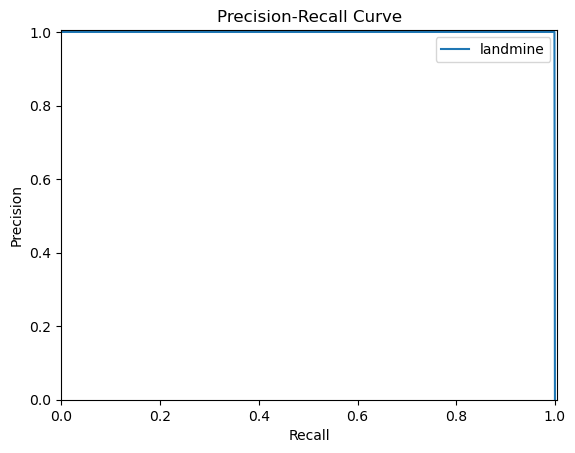

In [36]:
%matplotlib inline
pr_results = results.curves_results[0]

fig, ax = plt.subplots()
# ax.plot(pr_results[0], pr_results[1].mean(axis=0), label='all')
for index in results.ap_class_index:
  ax.plot(pr_results[0], pr_results[1][index], label=results.names[index])
ax.set_xlabel(pr_results[2])
ax.set_ylabel(pr_results[3])
ax.set_title("Precision-Recall Curve")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlim([0, 1.005])
ax.set_ylim([0, 1.005])
plt.show()

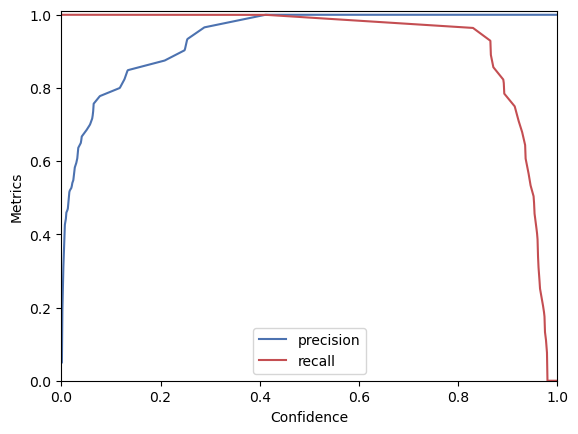

In [35]:
p_results = results.curves_results[2]
r_results = results.curves_results[3]

fig, ax = plt.subplots()
# for index in results_val.ap_class_index:
#   ax.plot(pr_results[0], p_results[1][index], label=results.names[index])
ax.plot(p_results[0], p_results[1].mean(axis=0), label='precision', color='b')
ax.plot(r_results[0], r_results[1].mean(axis=0), label='recall', color='r')
ax.set_xlabel(p_results[2])
ax.set_ylabel('Metrics')
ax.legend(loc='lower center')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.01])
plt.show()
# plot plotly where you can choose which class you want